In [1]:
import os

from data_collector import DataCollector

from dotenv import load_dotenv
from pandas import read_csv


load_dotenv('.env')

True

In [3]:
api_key = os.environ.get('CG_API_KEY')

instance = DataCollector(api_key)

In [4]:
bitmex_index_4h = read_csv('data/Bitmex_BTC_Index_4h_agg.csv', index_col='timestamp')

In [5]:
kraken_perp_4h = read_csv('data/Kraken_BTC_IP_4h.csv', index_col='timestamp')

In [6]:
close_diff_percentage = ((bitmex_index_4h['Close'] - kraken_perp_4h['Close']) / kraken_perp_4h['Close']) * 100

In [7]:
close_diff_percentage.describe()

count    8262.000000
mean       -0.005669
std         0.073258
min        -1.774988
25%        -0.035464
50%        -0.003493
75%         0.027181
max         2.467052
Name: Close, dtype: float64

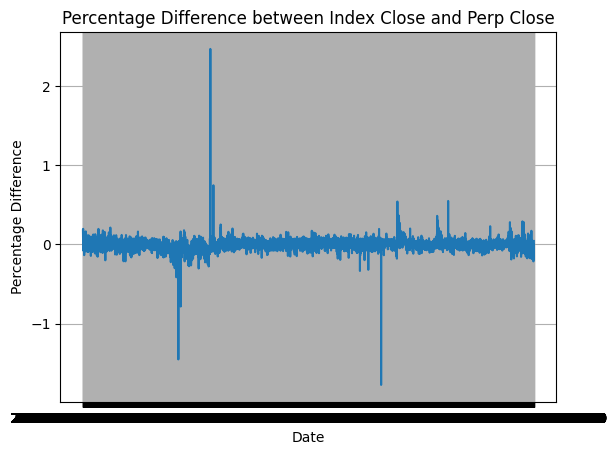

In [8]:
import matplotlib.pyplot as plt

plt.plot(close_diff_percentage)
plt.title('Percentage Difference between Index Close and Perp Close')
plt.xlabel('Date')
plt.ylabel('Percentage Difference')
plt.grid(True)
plt.show()

In [12]:
kraken_perp_1d_funding = instance.get_fr_ohlc('Kraken', 'PI_XBTUSD', '1d', '01.01.2022', '01.01.2024')
kraken_perp_1d_funding

,timestamp,FR Open,FR High,FR Low,FR Close
0,2022-01-01,0.001346,0.001346,-0.008870,-0.003600
1,2022-01-02,-0.003600,0.000136,-0.003600,0.000070
2,2022-01-03,0.000070,0.001486,-0.001514,-0.000606
3,2022-01-04,-0.000606,0.001357,-0.001459,-0.000525
4,2022-01-05,-0.000525,0.001762,-0.001435,0.000415
...,...,...,...,...,...
725,2023-12-27,0.004356,0.005493,0.002326,0.002589
726,2023-12-28,0.002589,0.006965,0.001609,0.004124
727,2023-12-29,0.004124,0.004225,0.001606,0.001930
728,2023-12-30,0.001930,0.004968,0.001794,0.003303


In [13]:
import numpy as np

def annualized_fr(funding_rate):
    funding_periods_per_year = 1095  # 3 periods/day * 365 days/year

    return np.exp(funding_rate * funding_periods_per_year) - 1

In [14]:
kraken_perp_1d_funding['Ann. FR'] = annualized_fr(kraken_perp_1d_funding['FR Close'])
kraken_perp_1d_funding

,timestamp,FR Open,FR High,FR Low,FR Close,Ann. FR
0,2022-01-01,0.001346,0.001346,-0.008870,-0.003600,-0.980581
1,2022-01-02,-0.003600,0.000136,-0.003600,0.000070,0.079782
2,2022-01-03,0.000070,0.001486,-0.001514,-0.000606,-0.484833
3,2022-01-04,-0.000606,0.001357,-0.001459,-0.000525,-0.437212
4,2022-01-05,-0.000525,0.001762,-0.001435,0.000415,0.575578
...,...,...,...,...,...,...
725,2023-12-27,0.004356,0.005493,0.002326,0.002589,16.035229
726,2023-12-28,0.002589,0.006965,0.001609,0.004124,90.450871
727,2023-12-29,0.004124,0.004225,0.001606,0.001930,7.279817
728,2023-12-30,0.001930,0.004968,0.001794,0.003303,36.233618
